# Projet Voitures electrique et borne de recharge

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from matplotlib import rcParams
#from matplotlib import axes
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 55)


In [6]:
Irve_df = pd.read_csv('Données/etalab_irve.csv',on_bad_lines='skip',parse_dates=["date_mise_en_service"])
Region_df= pd.read_csv('Données/georef-france-commune.csv',on_bad_lines='skip', sep=';')
Ve_df = pd.read_csv('Données/voitures-par-commune-par-energie(2).csv',on_bad_lines='skip', sep=';')
Communes_dept= pd.read_csv('Données/Commune2021.csv',on_bad_lines='skip', sep=';')
Region =pd.read_csv('Données/Region_2022.csv',on_bad_lines='skip', sep=',')
dept_df = pd.read_csv('Données/Departement_2022.csv',on_bad_lines='skip', sep=',')
#rain_data=pd.read_csv("train.csv",parse_dates=["date"])

Pib= pd.read_excel("Données/Classeur1.xlsx")


revenu= pd.read_csv("Données/Revenue_median_dept.csv", on_bad_lines='skip', sep=";")



print(Irve_df["id_pdc_itinerance"].nunique())


/var/folders/l3/vqrln6517tl991tlswjqjnb80000gn/T/ipykernel_28088/3143027448.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  Irve_df = pd.read_csv('Données/etalab_irve.csv',on_bad_lines='skip',parse_dates=["date_mise_en_service"])
/var/folders/l3/vqrln6517tl991tlswjqjnb80000gn/T/ipykernel_28088/3143027448.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Ve_df = pd.read_csv('Données/voitures-par-commune-par-energie(2).csv',on_bad_lines='skip', sep=';')


46799


## DATAFRAME BORNES ELECTRIQUE

In [7]:
# Si il a un doublon de borne on ne conceerve que la ligne de la derniere MAJ
Irve_df.drop_duplicates(subset='id_pdc_itinerance',keep = 'first', inplace=True)
Irve_df.shape


(46799, 50)

In [8]:
print('Le fichier contient ' ,Irve_df["nom_operateur"].nunique(), 'opérateurs differents')
df_operateurs= Irve_df.groupby("nom_operateur").count()


Le fichier contient  101 opérateurs differents


In [9]:
nbrBorne= Irve_df.drop_duplicates(subset='id_station_itinerance',keep = 'first')
#nbrBorne2 =  nbrBorne.dropna(axis=1, subset="")
n = nbrBorne["nbre_pdc"].sum()

print("nombre de bornes",n)


nombre de bornes 52141


In [10]:
display(Irve_df[:1])

,nom_amenageur,siren_amenageur,contact_amenageur,nom_operateur,contact_operateur,telephone_operateur,nom_enseigne,id_station_itinerance,id_station_local,nom_station,implantation_station,adresse_station,code_insee_commune,coordonneesXY,nbre_pdc,id_pdc_itinerance,id_pdc_local,puissance_nominale,prise_type_ef,prise_type_2,prise_type_combo_ccs,prise_type_chademo,prise_type_autre,gratuit,paiement_acte,paiement_cb,paiement_autre,tarification,condition_acces,reservation,horaires,accessibilite_pmr,restriction_gabarit,station_deux_roues,raccordement,num_pdl,date_mise_en_service,observations,date_maj,cable_t2_attache,last_modified,datagouv_dataset_id,datagouv_resource_id,datagouv_organization_or_owner,consolidated_longitude,consolidated_latitude,consolidated_code_postal,consolidated_commune,consolidated_is_lon_lat_correct,consolidated_is_code_insee_verified
0,ELECTRA,891624884.0,help@electra.com,ELECTRA,help@electra.com,NaN,ELECTRA,FRELCPAXPHC,NaN,Aix-en-Provence - Hôtel Campanile Pont de l'Arc,Station dédiée à la recharge rapide,1 rue Jean Andreani 13090 Aix-en-Provence,13001,"[5.43628000,43.51220700]",4,FRELCEKR2K,NaN,150.0,false,false,true,false,false,false,true,true,true,NaN,Accès libre,true,24/7,Accessibilité inconnue,Inconnu,false,Direct,NaN,2023-01-12,Télécharger l'application ELECTRA pour réserve...,2023-04-30,NaN,2023-04-30T05:05:12.594000+00:00,623ca46c13130c3228abd018,364ee9db-ae49-484d-87b2-212635dd6e82,electra,5.43628,43.512207,13090.0,Aix-en-Provence,True,True


,annee/month,annee,month,nbre_pdc
0,01/2000,2000,01,114
78,10/2002,2002,10,1


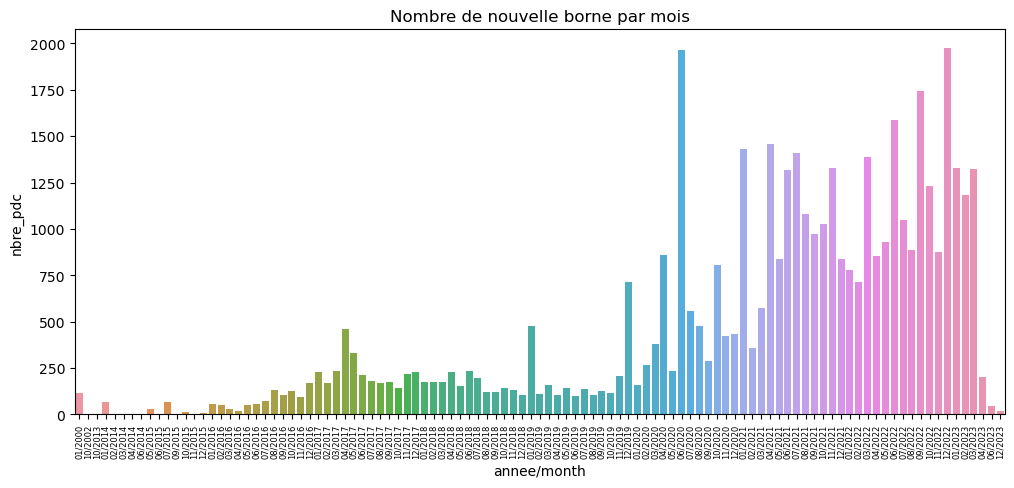

In [11]:
#Date de mise en service

# figure size in inches
rcParams['figure.figsize'] = 12,5


Irve_df['Date_MES'] = pd.to_datetime(Irve_df['date_mise_en_service'], errors='coerce')

# formatage des colonnes Année et mois de mise en service
Irve_df['annee/month'] = Irve_df['Date_MES'].dt.strftime('%m/%Y')
Irve_df['month'] = Irve_df['Date_MES'].dt.strftime('%m')
Irve_df['annee'] = Irve_df['Date_MES'].dt.strftime('%Y')

Borne_par_mois= pd.DataFrame(data=Irve_df.loc[Irve_df["annee"]!= '1970']) 
Borne_par_mois= Borne_par_mois.groupby(['annee/month', 'annee','month'], as_index=False)['nbre_pdc'].count()  #Nombre de nouvelles borne par mois et par années

Borne_par_mois.sort_values(by=['annee','month'], ascending=True, inplace=True)
display(Borne_par_mois[:2])

# Graphique
sns.barplot(data=Borne_par_mois, x='annee/month',y='nbre_pdc')

plt.tick_params(axis='x', rotation=90, labelsize=6)
plt.title("Nombre de nouvelle borne par mois")
plt.show()


In [12]:
# Region df Nettoyage du fichier pour ne garder que les codes commune, nom region et nom departement
#display(Region_df)
Region_df= pd.DataFrame(data=Region_df[["Code Officiel Commune",'Nom Officiel Région','Nom Officiel Département', "Code Officiel Département",'Nom Officiel Commune']])
Region_df.rename(columns={"Nom Officiel Commune":'consolidated_commune'}, inplace=True)
display(Region_df.shape, Region_df[:20])

#Jointure entre Irve et Region.
Irve_df = pd.merge(left= Irve_df, right=Region_df, on="consolidated_commune", how="left")
display(Irve_df[:1])




(34968, 5)

,Code Officiel Commune,Nom Officiel Région,Nom Officiel Département,Code Officiel Département,consolidated_commune
0,28199,Centre-Val de Loire,Eure-et-Loir,28,Janville-en-Beauce
1,28200,Centre-Val de Loire,Eure-et-Loir,28,Jaudrais
2,28217,Centre-Val de Loire,Eure-et-Loir,28,Louvilliers-lès-Perche
3,28273,Centre-Val de Loire,Eure-et-Loir,28,Moulhard
4,28309,Centre-Val de Loire,Eure-et-Loir,28,Prunay-le-Gillon
5,28312,Centre-Val de Loire,Eure-et-Loir,28,Puiseux
6,29005,Bretagne,Finistère,29,Baye
7,29013,Bretagne,Finistère,29,Botmeur
8,29089,Bretagne,Finistère,29,Kergloff
9,29107,Bretagne,Finistère,29,Landudal


,nom_amenageur,siren_amenageur,contact_amenageur,nom_operateur,contact_operateur,telephone_operateur,nom_enseigne,id_station_itinerance,id_station_local,nom_station,implantation_station,adresse_station,code_insee_commune,coordonneesXY,nbre_pdc,id_pdc_itinerance,id_pdc_local,puissance_nominale,prise_type_ef,prise_type_2,prise_type_combo_ccs,prise_type_chademo,prise_type_autre,gratuit,paiement_acte,paiement_cb,paiement_autre,...,accessibilite_pmr,restriction_gabarit,station_deux_roues,raccordement,num_pdl,date_mise_en_service,observations,date_maj,cable_t2_attache,last_modified,datagouv_dataset_id,datagouv_resource_id,datagouv_organization_or_owner,consolidated_longitude,consolidated_latitude,consolidated_code_postal,consolidated_commune,consolidated_is_lon_lat_correct,consolidated_is_code_insee_verified,Date_MES,annee/month,month,annee,Code Officiel Commune,Nom Officiel Région,Nom Officiel Département,Code Officiel Département
0,ELECTRA,891624884.0,help@electra.com,ELECTRA,help@electra.com,NaN,ELECTRA,FRELCPAXPHC,NaN,Aix-en-Provence - Hôtel Campanile Pont de l'Arc,Station dédiée à la recharge rapide,1 rue Jean Andreani 13090 Aix-en-Provence,13001,"[5.43628000,43.51220700]",4,FRELCEKR2K,NaN,150.0,false,false,true,false,false,false,true,true,true,...,Accessibilité inconnue,Inconnu,false,Direct,NaN,2023-01-12,Télécharger l'application ELECTRA pour réserve...,2023-04-30,NaN,2023-04-30T05:05:12.594000+00:00,623ca46c13130c3228abd018,364ee9db-ae49-484d-87b2-212635dd6e82,electra,5.43628,43.512207,13090.0,Aix-en-Provence,True,True,2023-01-12,01/2023,01,2023,13001,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13


In [13]:
# Nombre de borne par region

print(Irve_df.isnull().sum(axis = 0))
#display(Irve_df.loc[Irve_df['Nom Officiel Région'].isnull() == True])
Nbr_pdc_region = pd.DataFrame(data=Irve_df)
Nbr_pdc_region= Nbr_pdc_region.groupby(['Nom Officiel Région'], as_index=False)['nbre_pdc'].count()

#display(Nbr_pdc_region)
print(Nbr_pdc_region['nbre_pdc'].sum())

nom_amenageur                           3513
siren_amenageur                        14239
contact_amenageur                      14316
nom_operateur                           4008
contact_operateur                          0
telephone_operateur                     3990
nom_enseigne                               0
id_station_itinerance                      0
id_station_local                       21518
nom_station                                0
implantation_station                       0
adresse_station                            0
code_insee_commune                     15086
coordonneesXY                              0
nbre_pdc                                   0
id_pdc_itinerance                          0
id_pdc_local                           20445
puissance_nominale                         0
prise_type_ef                              0
prise_type_2                               0
prise_type_combo_ccs                       0
prise_type_chademo                         0
prise_type

## DATA FRAME VOITURES ELECTRIQUES

In [14]:
# DF VE
print("Il y a ",Ve_df.shape, "lignes avant d'enlever les doublons")
Ve_df.drop_duplicates(subset="libgeo" , keep='last', inplace=True)
print("Il y a ",Ve_df.shape,"apres avoir enlevé les doublons. sachant qu'il y 34 965 commune en france")
#display("info:",Ve_df.info())
Ve_df.drop(labels=["epci","libepci"],axis=1, inplace=True)
#display(Ve_df[:15])





Il y a  (351796, 8) lignes avant d'enlever les doublons
Il y a  (32753, 8) apres avoir enlevé les doublons. sachant qu'il y 34 965 commune en france


In [15]:
print("Nombre de VE ",Ve_df["nb_vp_rechargeables_el"].sum())




Nombre de VE  962860


In [16]:
display(Communes_dept[:2])
Ve_df.to_csv("Ve_par_commune.csv", sep=";")
Ve_df2 = pd.read_csv('Ve_par_commune.csv',on_bad_lines='skip', sep=';')
#Communes_dept.drop(labels=["CTCD","ARR","TNCC","NCCENR", "LIBELLE","CAN","TYPECOM","COMPARENT"], axis=1, inplace=True)
Ve_df2= pd.merge(left =Ve_df2, right=Communes_dept, left_on='codgeo', right_on= 'COM' ,how='left')

#merge_asof
#Ve_df= pd.merge_asof(left =Ve_df, right=Communes_dept, left_on='codgeo', right_on= 'COM' )
display(Ve_df2[:10])
Ve_df.drop_duplicates(subset="libgeo" , keep='last', inplace=True)
print(Ve_df2.shape, Ve_df2.isna().sum())


,TYPECOM,COM,REG,DEP,CTCD,ARR,TNCC,NCC,NCCENR,LIBELLE,CAN,COMPARENT
0,COM,1001,84.0,1,01D,12,5,ABERGEMENT CLEMENCIAT,Abergement-Clémenciat,L'Abergement-Clémenciat,108,NaN
1,COM,1002,84.0,1,01D,11,5,ABERGEMENT DE VAREY,Abergement-de-Varey,L'Abergement-de-Varey,101,NaN


,Unnamed: 0,codgeo,libgeo,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,TYPECOM,COM,REG,DEP,CTCD,ARR,TNCC,NCC,NCCENR,LIBELLE,CAN,COMPARENT
0,12004,10444,VULAINES,2023-03-31,1,0,272,COM,10444,44.0,10,10D,103,0.0,VULAINES,Vulaines,Vulaines,1001,NaN
1,33694,1125,CORVEISSIAT,2023-03-31,12,0,758,COM,1125,84.0,1,01D,12,0.0,CORVEISSIAT,Corveissiat,Corveissiat,118,NaN
2,33825,1179,GRIÈGES,2023-03-31,16,0,2000,COM,1179,84.0,1,01D,12,0.0,GRIEGES,Grièges,Grièges,123,NaN
3,33909,1212,LESCHEROUX,2022-09-30,4,0,831,COM,1212,84.0,1,01D,12,0.0,LESCHEROUX,Lescheroux,Lescheroux,117,NaN
4,34036,1260,LE MONTELLIER,2022-12-31,6,0,334,COM,1260,84.0,1,01D,11,2.0,MONTELLIER,Montellier,Le Montellier,112,NaN
5,34221,1329,ROSSILLON,2023-03-31,2,0,214,COM,1329,84.0,1,01D,11,0.0,ROSSILLON,Rossillon,Rossillon,104,NaN
6,34508,1420,THOISSEY,2022-12-31,13,0,1576,COM,1420,84.0,1,01D,12,0.0,THOISSEY,Thoissey,Thoissey,108,NaN
7,34792,2047,BARENTON-CEL,2022-09-30,1,0,133,COM,2047,32.0,2,02D,22,0.0,BARENTON CEL,Barenton-Cel,Barenton-Cel,211,NaN
8,34888,2076,BERTRICOURT,2021-12-31,0,0,152,COM,2076,32.0,2,02D,22,0.0,BERTRICOURT,Bertricourt,Bertricourt,206,NaN
9,34951,2095,BOHAIN-EN-VERMANDOIS,2023-03-31,27,1,4876,COM,2095,32.0,2,02D,23,0.0,BOHAIN EN VERMANDOIS,Bohain-en-Vermandois,Bohain-en-Vermandois,201,NaN


(33365, 19) Unnamed: 0                     0
codgeo                         0
libgeo                         0
date_arrete                    0
nb_vp_rechargeables_el         0
nb_vp_rechargeables_gaz        0
nb_vp                          0
TYPECOM                       10
COM                           10
REG                          627
DEP                          627
CTCD                         627
ARR                          644
TNCC                          10
NCC                           10
NCCENR                        10
LIBELLE                       10
CAN                          769
COMPARENT                  32703
dtype: int64


In [17]:
#display(Region_df[:4])

Ve_df2= pd.merge(left =Ve_df2, right=Region, left_on='REG', right_on= 'REG' ,how='left')
#Ve_df.drop(labels=["COM","REG", "DEP", "NCC","Code Officiel Commune","consolidated_commune"], axis=1, inplace=True)
display(Ve_df2.shape, Ve_df2[:10], Ve_df2.isna().sum())

(33365, 24)

,Unnamed: 0,codgeo,libgeo,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,TYPECOM,COM,REG,DEP,CTCD,ARR,TNCC_x,NCC_x,NCCENR_x,LIBELLE_x,CAN,COMPARENT,CHEFLIEU,TNCC_y,NCC_y,NCCENR_y,LIBELLE_y
0,12004,10444,VULAINES,2023-03-31,1,0,272,COM,10444,44.0,10,10D,103,0.0,VULAINES,Vulaines,Vulaines,1001,NaN,67482,2.0,GRAND EST,Grand Est,Grand Est
1,33694,1125,CORVEISSIAT,2023-03-31,12,0,758,COM,1125,84.0,1,01D,12,0.0,CORVEISSIAT,Corveissiat,Corveissiat,118,NaN,69123,1.0,AUVERGNE RHONE ALPES,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes
2,33825,1179,GRIÈGES,2023-03-31,16,0,2000,COM,1179,84.0,1,01D,12,0.0,GRIEGES,Grièges,Grièges,123,NaN,69123,1.0,AUVERGNE RHONE ALPES,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes
3,33909,1212,LESCHEROUX,2022-09-30,4,0,831,COM,1212,84.0,1,01D,12,0.0,LESCHEROUX,Lescheroux,Lescheroux,117,NaN,69123,1.0,AUVERGNE RHONE ALPES,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes
4,34036,1260,LE MONTELLIER,2022-12-31,6,0,334,COM,1260,84.0,1,01D,11,2.0,MONTELLIER,Montellier,Le Montellier,112,NaN,69123,1.0,AUVERGNE RHONE ALPES,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes
5,34221,1329,ROSSILLON,2023-03-31,2,0,214,COM,1329,84.0,1,01D,11,0.0,ROSSILLON,Rossillon,Rossillon,104,NaN,69123,1.0,AUVERGNE RHONE ALPES,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes
6,34508,1420,THOISSEY,2022-12-31,13,0,1576,COM,1420,84.0,1,01D,12,0.0,THOISSEY,Thoissey,Thoissey,108,NaN,69123,1.0,AUVERGNE RHONE ALPES,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes
7,34792,2047,BARENTON-CEL,2022-09-30,1,0,133,COM,2047,32.0,2,02D,22,0.0,BARENTON CEL,Barenton-Cel,Barenton-Cel,211,NaN,59350,4.0,HAUTS DE FRANCE,Hauts-de-France,Hauts-de-France
8,34888,2076,BERTRICOURT,2021-12-31,0,0,152,COM,2076,32.0,2,02D,22,0.0,BERTRICOURT,Bertricourt,Bertricourt,206,NaN,59350,4.0,HAUTS DE FRANCE,Hauts-de-France,Hauts-de-France
9,34951,2095,BOHAIN-EN-VERMANDOIS,2023-03-31,27,1,4876,COM,2095,32.0,2,02D,23,0.0,BOHAIN EN VERMANDOIS,Bohain-en-Vermandois,Bohain-en-Vermandois,201,NaN,59350,4.0,HAUTS DE FRANCE,Hauts-de-France,Hauts-de-France


Unnamed: 0                     0
codgeo                         0
libgeo                         0
date_arrete                    0
nb_vp_rechargeables_el         0
nb_vp_rechargeables_gaz        0
nb_vp                          0
TYPECOM                       10
COM                           10
REG                          627
DEP                          627
CTCD                         627
ARR                          644
TNCC_x                        10
NCC_x                         10
NCCENR_x                      10
LIBELLE_x                     10
CAN                          769
COMPARENT                  32703
CHEFLIEU                     627
TNCC_y                       627
NCC_y                        627
NCCENR_y                     627
LIBELLE_y                    627
dtype: int64

In [18]:
Ve_df2.drop(labels=["COM","REG", "CAN","TYPECOM","CTCD","ARR","LIBELLE_x",
                    "COMPARENT", "CHEFLIEU","TNCC_x","NCC_x","NCCENR_x"], axis=1, inplace=True)

Ve_df2.rename(columns={"NCC_y": "Nom region"}, inplace=True)
display(Ve_df2[:2], Ve_df2.isna().sum(), Ve_df2.shape)



,Unnamed: 0,codgeo,libgeo,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,DEP,TNCC_y,Nom region,NCCENR_y,LIBELLE_y
0,12004,10444,VULAINES,2023-03-31,1,0,272,10,2.0,GRAND EST,Grand Est,Grand Est
1,33694,1125,CORVEISSIAT,2023-03-31,12,0,758,1,1.0,AUVERGNE RHONE ALPES,Auvergne-Rhône-Alpes,Auvergne-Rhône-Alpes


Unnamed: 0                   0
codgeo                       0
libgeo                       0
date_arrete                  0
nb_vp_rechargeables_el       0
nb_vp_rechargeables_gaz      0
nb_vp                        0
DEP                        627
TNCC_y                     627
Nom region                 627
NCCENR_y                   627
LIBELLE_y                  627
dtype: int64

(33365, 12)

In [19]:
#display(dept_df[:10])
Ve_df2= pd.merge(left =Ve_df2, right=dept_df, left_on='DEP', right_on= 'DEP' ,how='left')

display(Ve_df2.info(), Ve_df2[:1])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33365 entries, 0 to 33364
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               33365 non-null  int64  
 1   codgeo                   33365 non-null  object 
 2   libgeo                   33365 non-null  object 
 3   date_arrete              33365 non-null  object 
 4   nb_vp_rechargeables_el   33365 non-null  int64  
 5   nb_vp_rechargeables_gaz  33365 non-null  int64  
 6   nb_vp                    33365 non-null  int64  
 7   DEP                      32738 non-null  object 
 8   TNCC_y                   32738 non-null  float64
 9   Nom region               32738 non-null  object 
 10  NCCENR_y                 32738 non-null  object 
 11  LIBELLE_y                32738 non-null  object 
 12  REG                      32738 non-null  float64
 13  CHEFLIEU                 32738 non-null  object 
 14  TNCC                  

None

,Unnamed: 0,codgeo,libgeo,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,DEP,TNCC_y,Nom region,NCCENR_y,LIBELLE_y,REG,CHEFLIEU,TNCC,NCC,NCCENR,LIBELLE
0,12004,10444,VULAINES,2023-03-31,1,0,272,10,2.0,GRAND EST,Grand Est,Grand Est,44.0,10387,5.0,AUBE,Aube,Aube


In [20]:
Ve_df2.drop(labels=["NCCENR_y","LIBELLE_y","REG","CHEFLIEU","TNCC","NCCENR","LIBELLE","TNCC_y"], axis=1, inplace=True)

In [21]:
Ve_df2.rename(columns={"NCC": "Nom departement"}, inplace=True)
display(Ve_df2[:10])


,Unnamed: 0,codgeo,libgeo,date_arrete,nb_vp_rechargeables_el,nb_vp_rechargeables_gaz,nb_vp,DEP,Nom region,Nom departement
0,12004,10444,VULAINES,2023-03-31,1,0,272,10,GRAND EST,AUBE
1,33694,1125,CORVEISSIAT,2023-03-31,12,0,758,1,AUVERGNE RHONE ALPES,AIN
2,33825,1179,GRIÈGES,2023-03-31,16,0,2000,1,AUVERGNE RHONE ALPES,AIN
3,33909,1212,LESCHEROUX,2022-09-30,4,0,831,1,AUVERGNE RHONE ALPES,AIN
4,34036,1260,LE MONTELLIER,2022-12-31,6,0,334,1,AUVERGNE RHONE ALPES,AIN
5,34221,1329,ROSSILLON,2023-03-31,2,0,214,1,AUVERGNE RHONE ALPES,AIN
6,34508,1420,THOISSEY,2022-12-31,13,0,1576,1,AUVERGNE RHONE ALPES,AIN
7,34792,2047,BARENTON-CEL,2022-09-30,1,0,133,2,HAUTS DE FRANCE,AISNE
8,34888,2076,BERTRICOURT,2021-12-31,0,0,152,2,HAUTS DE FRANCE,AISNE
9,34951,2095,BOHAIN-EN-VERMANDOIS,2023-03-31,27,1,4876,2,HAUTS DE FRANCE,AISNE


In [22]:
Ve_dept = Ve_df2.groupby(by=["DEP"]).sum()
display(Ve_dept["nb_vp_rechargeables_el"].sum())

962817

In [23]:
Ve_df2.to_csv("Ve_par_commune_dept_reg.csv", sep=";")

In [24]:
Irve_df.to_csv("Irve_df.csv", sep=";")

In [25]:
display(revenu[:5])

,Code deartement,Deartement,Niveau de vie annuel median
0,1,Ain,24030
1,2,Aisne,20300
2,3,Allier,20990
3,4,Alpes-de-Haute-Provence,21130
4,5,Hautes-Alpes,21420


In [26]:
print(revenu.dtypes)
revenu['Niveau de vie annuel median'].sum()


Code deartement                object
Deartement                     object
Niveau de vie annuel median     int64
dtype: object


2152730